In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Figure 15e left

In [16]:
def generate_random_forest(selected_file,all_candidate_file):
    supply_data=np.load(selected_file,allow_pickle=True).item()
    params=np.load(all_candidate_file,allow_pickle=True)
    selected_index=[]
    for k,_ in supply_data.items():
        idx=int(k.split("_")[1])
        selected_index.append(idx)
    random_forest=[]
    for idx,param in enumerate(params):
        if idx in selected_index:
            random_forest.append([param,1])
        else:
            random_forest.append([param,0])
    return random_forest

## Results for Starlink official demands

In [17]:
selected_file_starlink="data/random_forest/Selected_params_starlink_customers.npy"
all_candidate_file_starlink="data/random_forest/Starlink_customers_params_mix.npy"
data_official=generate_random_forest(selected_file_starlink,all_candidate_file_starlink)
x=[item[0]for item in data_official]
y=[item[1]for item in data_official]
feature_names=["Height","Inc","Alpha0"]
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.25, random_state=42) # Split dataset into 75% train and 25% test
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
# Built-in feature importance (Gini Importance)
importances_official = clf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances_official}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

  Feature  Gini Importance
1     Inc         0.462132
2  Alpha0         0.440227
0  Height         0.097642


## Results for Latin America demands

In [20]:
selected_file_latin="data/random_forest/Selected_params_Latin_America.npy"
all_candidate_file_latin="data/random_forest/Latin_America_params_mix.npy"
data_south=generate_random_forest(selected_file_latin,all_candidate_file_latin)
x=[item[0]for item in data_south]
y=[item[1]for item in data_south]
feature_names=["Height","Inc","Alpha0"]
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.25, random_state=42) # Split dataset into 75% train and 25% test
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
# Built-in feature importance (Gini Importance)
importances_south = clf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances_south}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

  Feature  Gini Importance
1     Inc         0.478220
2  Alpha0         0.424938
0  Height         0.096842


## Results for backbone network demands

In [6]:
selected_file_backbone="data/random_forest/Selected_params_backbone.npy"
all_candidate_file_backbone="data/random_forest/Backbone_params_mix.npy"
data_backbone=generate_random_forest(selected_file_backbone,all_candidate_file_backbone)
x=[item[0]for item in data_backbone]
y=[item[1]for item in data_backbone]
feature_names=["Height","Inc","Alpha0"]
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.25, random_state=42) # Split dataset into 75% train and 25% test
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
# Built-in feature importance (Gini Importance)
importances_backbone = clf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances_backbone}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

  Feature  Gini Importance
2  Alpha0         0.497853
1     Inc         0.471342
0  Height         0.030806


In [ ]:
data=np.load(all_candidate_file_backbone,allow_pickle=True)
new_data=[]
for item in data:
    new_data.append(item[0])
np.save(all_candidate_file_backbone,new_data)

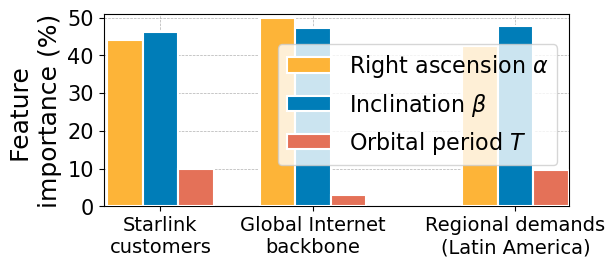

In [7]:
plt.rcParams['pdf.fonttype'] = 42
fig=plt.figure(figsize=(6,2.5))
location=[5,9.3,15]
width=1
lw=1.5
bias=[-width,0,width]
colors=["#FDB438","#007DB8","#E47158"]
labels=[r"Right ascension $\alpha$",r"Inclination $\beta$",r"Orbital period $T$"]
xlabels=["Starlink\ncustomers","Global Internet\nbackbone","Regional demands\n(Latin America)"]
index_list=[2,1,0]
plt.grid(True, linestyle="--", linewidth=0.5,zorder=0)

for idx in range(3):
    plt_data=[importances_official[index_list[idx]]*100,importances_backbone[index_list[idx]]*100,importances_south[index_list[idx]]*100]
    plt.bar([item+bias[idx]for item in location],plt_data,width=width,edgecolor="w",color=colors[idx],lw=lw,label=labels[idx],zorder=3)

plt.ylim(0,51)
plt.xlim(5-width*1.5-0.1,15+1.5*width)
plt.ylabel("Feature \nimportance (%)",fontsize=18)
plt.xticks(location,xlabels,fontsize=14)
plt.yticks(fontsize=15)
plt.legend(fontsize=16,loc="upper right",bbox_to_anchor=(1,0.9))
plt.savefig("figure15e_left.pdf",bbox_inches="tight")
plt.savefig("figure15e_left.png",bbox_inches="tight")

# Figure15e right

In [8]:
selected_params=np.load("data/Tinyleo_for_starlink_demand.npy",allow_pickle=True)

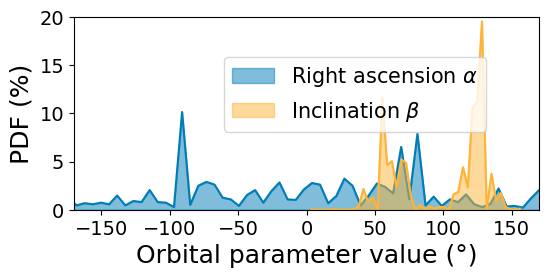

In [9]:
fig=plt.figure(figsize=(6,2.5))
colors=["#FDB438","#007DB8","#E47158"]
distribution_beta=[item[0][1]*180/np.pi for item in selected_params ]
distribution_alpha=[item[0][2]*180/np.pi-180 for item in selected_params]
distribution_beta.append(0)
distribution_alpha.append(0)

count_alpha, bins_alpha = np.histogram(distribution_alpha, bins=60) 
pdf_alpha = count_alpha / sum(count_alpha) 
plt.plot(bins_alpha[1:], pdf_alpha*100, color=colors[1],zorder=1)
plt.fill_between(bins_alpha[1:], pdf_alpha*100, color=colors[1], label="Right ascension"+r" $\alpha$",alpha=0.5)
count_beta, bins_count = np.histogram(distribution_beta, bins=45) 
pdf_beta = count_beta / sum(count_beta) 
plt.plot(bins_count[1:], pdf_beta*100,color=colors[0])
plt.fill_between(bins_count[1:], pdf_beta*100,color=colors[0], label="Inclination"+r" $\beta$",alpha=0.5)

plt.legend(fontsize=15,loc="upper left",bbox_to_anchor=(0.3,0.85))
plt.xlim(-170,170)
plt.ylim(0,20)
plt.ylabel("PDF (%)",fontsize=18)
plt.xlabel("Orbital parameter value (°)",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks([0,5,10,15,20],fontsize=14)
plt.savefig("figure15e_right.pdf",bbox_inches="tight")
plt.savefig("figure15e_right.png",bbox_inches="tight")